# I. Problem Statement / Research Topic

For this project, our group will be performing sentiment analysis on President Donald Trump's tweets, and determining if there is any correlation between them and a selection of stock prices from various industries. The Trump administration has adopted very clear positions on certain business sectors. For example, he has spoken at great lengths of reviving America's coal industry. Hence, it would be interesting to analyse if he has indeed boosted these industries, using stock price as a proxy for underlying business performance. This project could also serve as an analysis to determine Trump's influence over economic performance in the stock markets.

# II. Dataset and Data Preperation
In terms of the main dataset, we will be using data obtained on Donald Trump's tweets from Kaggle. This dataset includes relevant information such as date, tweet text, number of retweets and number of favourites. It contains tweets from July 2015 to November 2016, which is the time period in which Trump was campaigning.

With regards to stock prices, these can be easily obtained from Yahoo Finance. A selection of stocks/indexes have been chosen. 

First, we include the S&P 500 index. Given Trump's pro-business stance, we hypothesise that the index would be performing well. Secondly, we consider the KOL index that tracks the performances of a wide selection of coal companies, with US companies taking a major proportion. We hypothesize that the index should have also grown with Trump's annoucements to revive the coal industry. Lastly, we take into account hospital stocks, which may have been impacted with Trump's announcements on sweaping healthcare reforms. We predict that these stocks will have taken on a declining path. We again include the Tenet Healthcare Corporation stock as a benchmark indicator for the healthcare sector's performance.

All of our datasets are provided in csv format. 

# III. Methodology

Some data cleaning has be used in order to prepare our data. We first cleaned up and amended a column in the Trump tweets dataset which had a wrong column name. Additionally, we decided to remove tweets which were not text (eg. links and video tweets) that provided no information for sentiment analysis. Using regex cleaning, we removed certain symbols associated with some tweets (eg @ and http://).

We also had to remove tweets from the Trump tweets dataset for dates where markets were closed (mostly weekends) in order to provide the correct timeframes to aggregate the sentiments with stock prices. 

For the sentiment analysis, we used the nltk package to derive our compound values to determine the sentiment of each Trump tweet. For the data visualisation, we used seaborn to allow us to display 2 plots on the same graph in order to provide a quick comparison between the sentiment value and stock price. 

# IV. Code

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading up csv file into DataFrame

trump_tweets_df = pd.read_csv('Donald-Tweets!.csv')

# Visualising the DataFrame

trump_tweets_df.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,NaN,NaN
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,NaN,NaN
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,NaN,NaN


In [3]:
# Renaming columns

trump_tweets_df.rename(columns = {'twt_favourites_IS_THIS_LIKE_QUESTION_MARK':'Favourites'}, inplace = True)

In [4]:
# Viewing unique types of tweets

print(trump_tweets_df['Type'].unique())

['text' 'link' 'video']


In [5]:
# Performing relevant cleanup to retain relevant columns for analysis

trump_tweets_df = trump_tweets_df[trump_tweets_df['Type'] == 'text']

trump_tweets_df = trump_tweets_df[['Date',
                                   'Tweet_Text',
                                   'Type',
                                   'Favourites',
                                   'Retweets']]

In [6]:
# Resetting index

trump_tweets_df = trump_tweets_df.reset_index(drop = True)

# Checking for any NA fields in the rows

trump_tweets_df.isnull().sum()

Date          0
Tweet_Text    0
Type          0
Favourites    0
Retweets      0
dtype: int64

In [7]:
# Perform Regex cleaning to remove Twitter symbols such as @ and websites inside tweets

import re

def clean_tweets(tweet):
    tweet = re.sub('http\S+','',tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    
    return tweet

trump_tweets_df['Cleaned Tweets'] = trump_tweets_df['Tweet_Text'].apply(clean_tweets)

In [8]:
# Looking at the cleaned tweets

pd.set_option('display.max_colwidth', -1)
display(trump_tweets_df['Cleaned Tweets'].iloc[:5])

0    Today we express our deepest gratitude to all those who have served in our armed forces. #ThankAVet                                       
1    Busy day planned in New York. Will soon be making some very important decisions on the people who will be running our government!         
2    Love the fact that the small groups of protesters last night have passion for our great country. We will all come together and be proud!  
3    Just had a very open and successful presidential election. Now professional protesters, incited by the media, are protesting. Very unfair!
4    A fantastic day in D.C. Met with President Obama for first time. Really good meeting, great chemistry. Melania liked Mrs. O a lot!        
Name: Cleaned Tweets, dtype: object

In [9]:
# Performing sentiment analysis using VADER approach

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def sentiment_analysis(tweet):
    ss = sid.polarity_scores(tweet)
    return(ss['compound'])

trump_tweets_df['Compound'] = trump_tweets_df['Cleaned Tweets'].apply(sentiment_analysis)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tayjn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Averaging Trump's daily sentiment, since he tweets multiple times per day

trump_tweets_final_df = trump_tweets_df.groupby('Date').mean()
trump_tweets_final_df.reset_index(inplace = True)
trump_tweets_final_df

,Date,Favourites,Retweets,Compound
0,15-07-16,1255.433333,685.333333,0.026030
1,15-07-17,2448.785714,1523.142857,0.068071
2,15-07-18,2144.172414,1041.862069,0.099369
3,15-07-19,1933.636364,1044.909091,0.123482
4,15-07-20,1148.323529,561.588235,0.160759
...,...,...,...,...
473,16-11-07,36438.111111,13630.333333,0.462344
474,16-11-08,94996.357143,42184.428571,0.425350
475,16-11-09,304194.666667,95941.666667,0.338933
476,16-11-10,159176.000000,44655.000000,0.795000


In [11]:
# Read in S&P Data

snp_df = pd.read_csv('SNP.csv')
snp_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-07-16,2110.550049,2124.419922,2110.550049,2124.290039,2124.290039,3227080000
1,15-07-17,2126.800049,2128.909912,2119.879883,2126.639893,2126.639893,3362750000
2,15-07-20,2126.850098,2132.820068,2123.659912,2128.280029,2128.280029,3245870000
3,15-07-21,2127.550049,2128.489990,2115.399902,2119.209961,2119.209961,3343690000
4,15-07-22,2118.209961,2118.510010,2110.000000,2114.149902,2114.149902,3694070000
...,...,...,...,...,...,...,...
331,16-11-04,2083.790039,2099.070068,2083.790039,2085.179932,2085.179932,3837860000
332,16-11-07,2100.590088,2132.000000,2100.590088,2131.520020,2131.520020,3736060000
333,16-11-08,2129.919922,2146.870117,2123.560059,2139.560059,2139.560059,3916930000
334,16-11-09,2131.560059,2170.100098,2125.350098,2163.260010,2163.260010,6264150000


In [12]:
# Finding weekend dates without closing prices

trump_dates = []
trump_dates = trump_tweets_final_df['Date'].tolist()

snp_dates = []
snp_dates = snp_df['Date'].tolist()

missing_dates = []

for date in trump_dates:
    if date not in snp_dates:
        missing_dates.append(date)
        
print(missing_dates)

['15-07-18', '15-07-19', '15-07-25', '15-07-26', '15-08-01', '15-08-02', '15-08-08', '15-08-09', '15-08-15', '15-08-16', '15-08-22', '15-08-23', '15-08-29', '15-09-05', '15-09-06', '15-09-07', '15-09-12', '15-09-13', '15-09-19', '15-09-20', '15-09-26', '15-10-03', '15-10-04', '15-10-10', '15-10-11', '15-10-17', '15-10-18', '15-10-24', '15-10-25', '15-10-31', '15-11-01', '15-11-07', '15-11-08', '15-11-14', '15-11-15', '15-11-21', '15-11-22', '15-11-26', '15-11-28', '15-11-29', '15-12-05', '15-12-06', '15-12-12', '15-12-13', '15-12-19', '15-12-20', '15-12-27', '16-01-01', '16-01-02', '16-01-03', '16-01-09', '16-01-10', '16-01-16', '16-01-17', '16-01-18', '16-01-23', '16-01-24', '16-01-30', '16-01-31', '16-02-06', '16-02-07', '16-02-13', '16-02-14', '16-02-15', '16-02-20', '16-02-21', '16-02-27', '16-02-28', '16-03-05', '16-03-06', '16-03-12', '16-03-13', '16-03-19', '16-03-20', '16-03-25', '16-03-26', '16-03-27', '16-04-02', '16-04-03', '16-04-09', '16-04-10', '16-04-16', '16-04-17', '16

In [13]:
# Removing missing dates from Trump DataFrame

for date in missing_dates:
    index_labels = trump_tweets_final_df[trump_tweets_final_df['Date'] == date].index
    trump_tweets_final_df.drop(index_labels, inplace = True)
    
trump_tweets_final_df.reset_index(inplace = True)

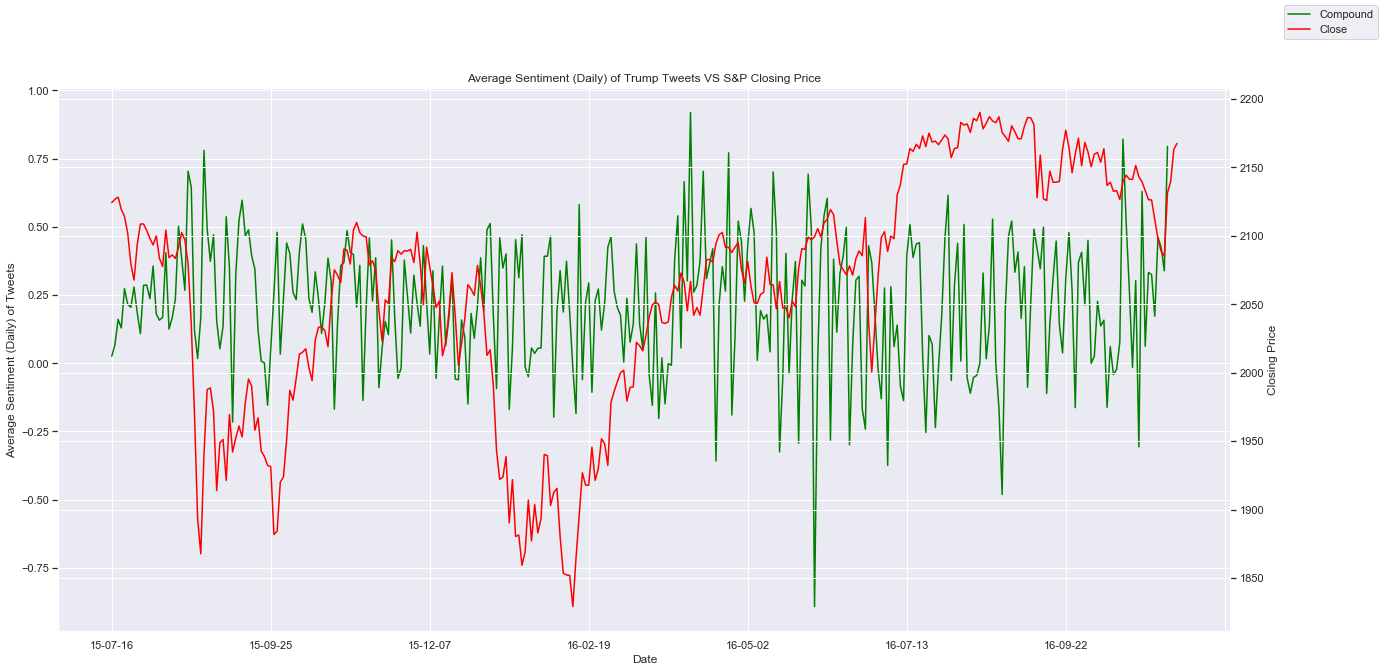

In [14]:
# Visualising the plot

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ax = trump_tweets_final_df.plot(x = 'Date',
                                y = 'Compound', 
                                figsize = (21,10),
                                legend = False,
                                color = 'green')
ax2 = ax.twinx()

snp_df.plot(x = 'Date',
            y = 'Close',
            ax = ax2,
            legend = False,
            color = 'red')

ax.set_ylabel('Average Sentiment (Daily) of Tweets')
ax2.set_ylabel('Closing Price')
ax.set_xlabel('Date')
ax.figure.legend()
plt.title('Average Sentiment (Daily) of Trump Tweets VS S&P Closing Price')

plt.show()

In [15]:
# Calculating correlation between Trump's tweets sentiments and S&P Closing Price

corr_snp = trump_tweets_final_df['Compound'].corr(snp_df['Close'])

if corr_snp > 0:
    print('There is a positive correlation of',corr_snp,'between sentiments of Trump tweets and the S&P Closing Price')
else:
    print('There is a negative correlation of',corr_snp,'between sentiments of Trump tweets and the S&P Closing Price')

There is a negative correlation of -0.026613987696760346 between sentiments of Trump tweets and the S&P Closing Price


In [16]:
# Read in KOL Data

kol_df = pd.read_csv('KOL.csv')
kol_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-07-16,103.900002,104.300003,103.400002,103.599998,79.880531,6700
1,15-07-17,103.699997,103.699997,102.300003,102.300003,78.878159,14700
2,15-07-20,101.599998,101.599998,99.699997,99.800003,76.950554,14000
3,15-07-21,99.500000,100.900002,99.500000,100.000000,77.104759,15800
4,15-07-22,98.400002,98.400002,97.400002,97.699997,75.331352,5700
...,...,...,...,...,...,...,...
330,16-11-03,131.899994,132.800003,130.600006,131.699997,106.396919,15000
331,16-11-04,131.600006,131.699997,130.699997,130.800003,105.669838,14100
332,16-11-07,133.600006,136.300003,132.899994,136.199997,110.032349,24400
333,16-11-08,133.399994,136.100006,133.399994,135.300003,109.305260,20000


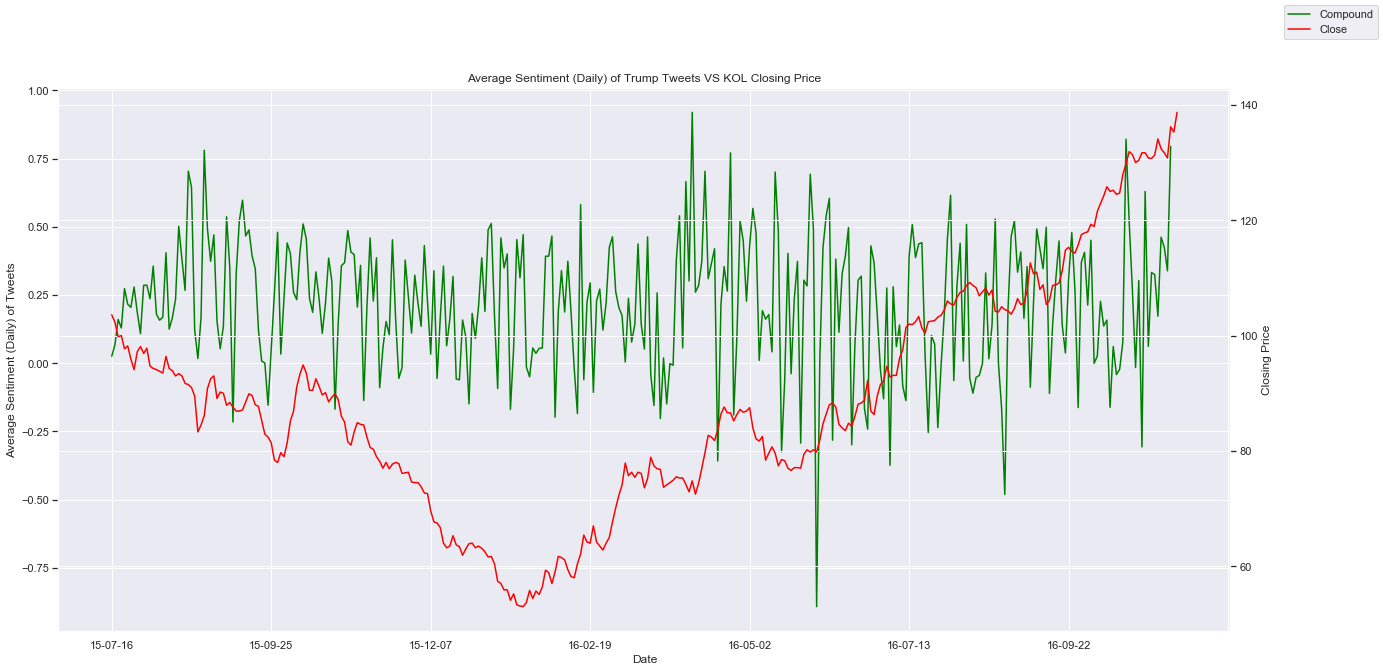

In [17]:
# Visualising the plot

ax = trump_tweets_final_df.plot(x = 'Date',
                                y = 'Compound', 
                                figsize = (21,10),
                                legend = False,
                                color = 'green')
ax2 = ax.twinx()

kol_df.plot(x = 'Date',
            y = 'Close',
            ax = ax2,
            legend = False,
            color = 'red')

ax.set_ylabel('Average Sentiment (Daily) of Tweets')
ax2.set_ylabel('Closing Price')
ax.set_xlabel('Date')
ax.figure.legend()
plt.title('Average Sentiment (Daily) of Trump Tweets VS KOL Closing Price')

plt.show()

In [18]:
# Calculating correlation between Trump's tweets sentiments and KOL Closing Price

corr_kol = trump_tweets_final_df['Compound'].corr(kol_df['Close'])

if corr_kol > 0:
    print('There is a positive correlation of',corr_kol,'between sentiments of Trump tweets and the KOL Closing Price')
else:
    print('There is a negative correlation of',corr_kol,'between sentiments of Trump tweets and the KOL Closing Price')

There is a positive correlation of 0.04038637373200869 between sentiments of Trump tweets and the KOL Closing Price


In [19]:
# Read in THC Data

thc_df = pd.read_csv('THC.csv')
thc_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-07-16,59.270000,59.320000,58.130001,59.009998,59.009998,2214600
1,15-07-17,59.060001,59.290001,58.380001,58.730000,58.730000,869500
2,15-07-20,58.740002,59.310001,58.340000,58.680000,58.680000,992100
3,15-07-21,58.630001,59.110001,57.209999,57.959999,57.959999,1551800
4,15-07-22,57.889999,58.930000,57.860001,58.500000,58.500000,972200
...,...,...,...,...,...,...,...
329,16-11-02,18.690001,19.340000,18.590000,18.799999,18.799999,3527600
330,16-11-03,18.860001,19.190001,17.469999,17.469999,17.469999,3948700
331,16-11-04,17.469999,18.100000,17.030001,17.750000,17.750000,4527600
332,16-11-07,18.620001,20.430000,18.559999,19.820000,19.820000,4461600


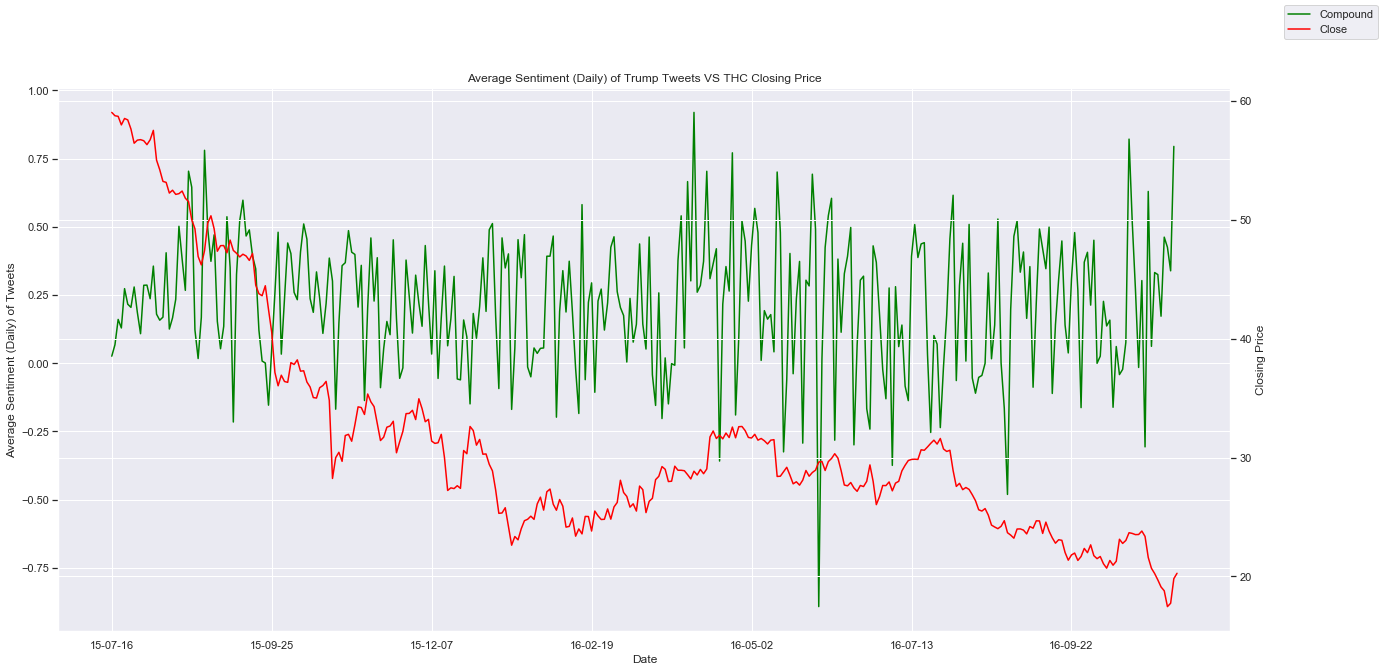

In [20]:
# Visualising the plot

ax = trump_tweets_final_df.plot(x = 'Date',
                                y = 'Compound', 
                                figsize = (21,10),
                                legend = False,
                                color = 'green')
ax2 = ax.twinx()

thc_df.plot(x = 'Date',
            y = 'Close',
            ax = ax2,
            legend = False,
            color = 'red')

ax.set_ylabel('Average Sentiment (Daily) of Tweets')
ax2.set_ylabel('Closing Price')
ax.set_xlabel('Date')
ax.figure.legend()
plt.title('Average Sentiment (Daily) of Trump Tweets VS THC Closing Price')

plt.show()

In [21]:
# Calculating correlation between Trump's tweets sentiments and THC Closing Price

corr_thc = trump_tweets_final_df['Compound'].corr(thc_df['Close'])

if corr_thc > 0:
    print('There is a positive correlation of',corr_thc,'between sentiments of Trump tweets and the THC Closing Price')
else:
    print('There is a negative correlation of',corr_thc,'between sentiments of Trump tweets and the THC Closing Price')

There is a positive correlation of 0.08625468612231084 between sentiments of Trump tweets and the THC Closing Price


# V. Insights / Valuation

From the graphs, we notice that the sentiment analysis on Trump's tweets produced largely positive values. This could well be due to 2 factors. Since the timeframe of the tweets were during Trump's campaign for the presidency, it would be natural to tweet more positive tweets in order to gain more support among voters. However, there is reason to speculate that Trump's tweets may be more controvertial, even though he may use more positive words within his tweets, thus people may tend to value his tweets more negatively in that aspect. A futher improvement to this research could be to use the Naive Bayes model to provide the sentiment analysis, which may be more accurate.

Another key insight from the plots are the fact that the prices of indexes and stocks are non-stationary and very volatile, thus they are extremely hard to predict using traditional forecasting methods. Thus, we cannot conclude from this project that Trump's tweets actually had an impact to stock prices, but merely observe the correlation between the sentiments and price trajectories. We also note that the KOL index (which takes into account coal companies) displayed an upward trend from 2016 onwards, while THC's prices were constantly on a downward trend for the entire time period. This ties into our hypotheses.

From the metrics, we see that there is a negative correlation between Trump's tweets and the S&P 500 index, while there is a positive one with the KOL index and THC stock. This may seem to indicate that Trump may have had an impact with regards to the coal and healthcare sectors, however we cannot assume this to be true. However, we also note that the correlation values are close to 0, thus indicating that there is a very weak correlation. This is likely due to the fact that stock and index prices fluctuate widely, thus making a single factor display a weak correlation.

In conclusion, Trump's tweets do have some relationship with stock prices, albeit it is only a correlationary relationship, and it is pretty weak. Further research could explore using the Naive Bayes Classifier to gain a better model in terms of sentiment analysis. Additionally, exploring more industries oustide of coal and healthcare could provide a more holistic result.